Below is the data cleaning process that I did on the datasets: Telco-Customer-Churn


# Connect To Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Data Cleaning Python

/content/gdrive/MyDrive/Data Cleaning Python


#Import Packages

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt

# Import Data

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Initial EDA (Exploratory Data Analysis)

In [ ]:
# Display the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Display the last 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# Display 5 random rows
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6928,5306-BVTKJ,Male,0,Yes,Yes,48,Yes,No,DSL,No,Yes,Yes,No,No,No,One year,Yes,Credit card (automatic),55.80,2651.2,No
1681,4836-WNFNO,Female,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.00,1849.2,No
3700,5616-PRTNT,Male,0,No,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.40,374.5,Yes
3754,7096-UCLNH,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
6161,4343-EJVQB,Male,0,No,No,7,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,74.35,533.6,No


In [ ]:
# Get the dataframe's info 
# (number of rows, column name & type, number of missing rows per column, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the results of the initial EDA code, no missing value was found. Then to make sure we need to look at all the information in the data using the code below

In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= customerID =================


7537-RBWEA    1
1676-MQAOA    1
4223-WOZCM    1
9800-OUIGR    1
2325-ZUSFD    1
             ..
3756-VNWDH    1
1891-UAWWU    1
2277-DJJDL    1
2664-XJZNO    1
3489-VSFRD    1
Name: customerID, Length: 7043, dtype: int64


============= gender =================


Male      3555
Female    3488
Name: gender, dtype: int64


============= SeniorCitizen =================


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


============= Partner =================


No     3641
Yes    3402
Name: Partner, dtype: int64


============= Dependents =================


No     4933
Yes    2110
Name: Dependents, dtype: int64


============= tenure =================


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


============= PhoneService =================


Yes    6361
No      682
Name: PhoneService, dtype: int64


============= MultipleLines =================


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


============= InternetService =================


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


============= OnlineSecurity =================


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


============= OnlineBackup =================


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


============= DeviceProtection =================


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


============= TechSupport =================


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


============= StreamingTV =================


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


============= StreamingMovies =================


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


============= Contract =================


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


============= PaperlessBilling =================


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


============= PaymentMethod =================


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


============= MonthlyCharges =================


20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64


============= TotalCharges =================


           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
92.25       1
1912.15     1
6424.7      1
95          1
483.15      1
Name: TotalCharges, Length: 6531, dtype: int64


============= Churn =================


No     5174
Yes    1869
Name: Churn, dtype: int64

From the code above, it was found in the TotalCharges column that there were 11 rows with no values. 
And confirmed again with the code below we can see that there are 11 empty columns that are replaced with NaN.


In [ ]:
df = df.replace(' ', np.nan)                   # to get rid of empty values
nan_values = df[df.isna().any(axis=1)]         # to get all rows with Na

nan_values 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Then the missing value will be handled in the TotalCharges column.

#Missing Values Handling


First, check the data type in the TotalCharges column.

In [ ]:
type(df['TotalCharges'][0])

str

It turns out that the data type is a string or object. If viewed from the column description, the data type should be a decimal number or float. Then first change the string data type to float data type.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)
print(df)
print(df.dtypes)

      customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95      1889.50     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80      1990.50     No
7039  2234-XADUH  Female              0  ...         103.20      7362.90     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40       306.60    Yes
7042  3186-AJIEK    Male              0  ...         105.65      6844.50     No

[7043 rows x 21 columns]
customerID    




First, we have to see what's the percentage of missing value in that column.
The string data type in the Total Charges column has been changed to float. Now check what's the percentage of missing value in that column. If it contained a lot of missing value (let say >35%), then we can just drop that column. If not, then we can do some imputation.

In [ ]:
100 * len(df[df['TotalCharges']==0]) / len(df)

0.15618344455487718

Then it is obtained that the percentage of the missing value is very low, which is only 0.16%. We can do the imputation on the TotalCharges column. 
To consider whether the missing value will be filled with the mean, median or mode. First look at the distribution of the data by looking at the boxplot diagram.

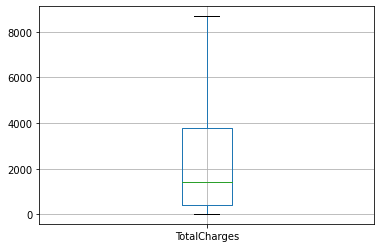

In [ ]:
df[['TotalCharges']].boxplot()

It is found that the data distribution is skewed.
If the variable is skewed, the mean is biased by the values ​​at the far end of the distribution. Therefore, the median is a better representation of the majority of the values ​​in the variable.

In [ ]:
# Mean imputation on Rating column

med_TotalCharges = df[df['TotalCharges']!=0]['TotalCharges'].median()

df['TotalCharges'] = df['TotalCharges'].apply(lambda x: med_TotalCharges if x== 0 else x)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= gender =================


Male      3555
Female    3488
Name: gender, dtype: int64


============= SeniorCitizen =================


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


============= Partner =================


No     3641
Yes    3402
Name: Partner, dtype: int64


============= Dependents =================


No     4933
Yes    2110
Name: Dependents, dtype: int64


============= tenure =================


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


============= PhoneService =================


Yes    6361
No      682
Name: PhoneService, dtype: int64


============= MultipleLines =================


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


============= InternetService =================


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


============= OnlineSecurity =================


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


============= OnlineBackup =================


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


============= DeviceProtection =================


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


============= TechSupport =================


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


============= StreamingTV =================


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


============= StreamingMovies =================


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


============= Contract =================


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


============= PaperlessBilling =================


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


============= PaymentMethod =================


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


============= MonthlyCharges =================


20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64


============= TotalCharges =================


20.200000      11
2283.300441    11
19.750000       9
19.900000       8
19.650000       8
               ..
1066.150000     1
249.950000      1
8333.950000     1
7171.700000     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64


============= Churn =================


No     5174
Yes    1869
Name: Churn, dtype: int64

#Duplicate Rows Handling

In [ ]:
len(df.drop_duplicates()) / len(df)

1.0

Since the number is 1.0, we conclude that there are no duplicate rows in this dataset. So, we don't need to do anything with the duplicate rows handling.

#Drop a Column

Then there is something we need to do, which is to remove the CustomerID column. Because it should not effect the analyisis we would conduct. Because it has nothing to do with the analysis of consumer behavior patterns, if we want to do that for example.

In [ ]:
df = df.drop(columns=['customerID'])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#Outlier handling

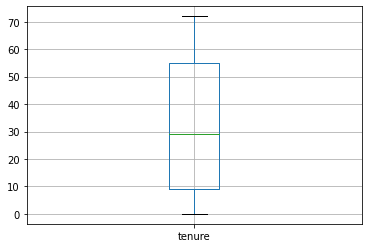

In [ ]:
df[['tenure']].boxplot()

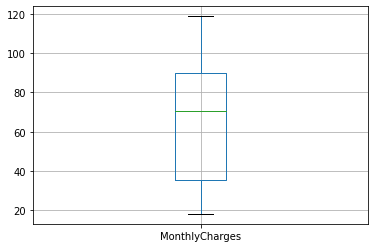

In [ ]:
df[['MonthlyCharges']].boxplot()

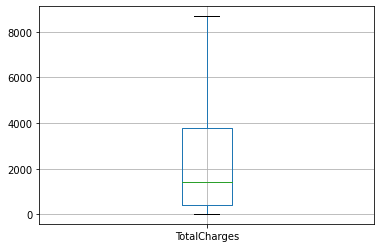

In [ ]:
df[['TotalCharges']].boxplot()


Based on the Box Plot, we can see that there are no data samples that lie outside the Q1 and Q3 areas. By definition, there are no outliers. So, no need to do anything.

#Categorical Data Encoding

At the categorical data encoding stage, we will do One Hot Encoding because the categorical data contained in the data set has no order / level information.

In [ ]:
pd.get_dummies(df['gender'])

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7038,0,1
7039,1,0
7040,1,0
7041,0,1


In [ ]:
pd.get_dummies(df['Partner'])

,No,Yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,0,1
7041,0,1


In [ ]:
pd.get_dummies(df['Dependents'])

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7038,0,1
7039,0,1
7040,0,1
7041,1,0


In [ ]:
pd.get_dummies(df['PhoneService'])

,No,Yes
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
7038,0,1
7039,0,1
7040,1,0
7041,0,1


In [ ]:
pd.get_dummies(df['MultipleLines'])

,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,0,1
7039,0,0,1
7040,0,1,0
7041,0,0,1


In [ ]:
pd.get_dummies(df['InternetService'])

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7038,1,0,0
7039,0,1,0
7040,1,0,0
7041,0,1,0


In [ ]:
pd.get_dummies(df['OnlineSecurity'])

,No,No internet service,Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
7038,0,0,1
7039,1,0,0
7040,0,0,1
7041,1,0,0


In [ ]:
pd.get_dummies(df['OnlineBackup'])

,No,No internet service,Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
7038,1,0,0
7039,0,0,1
7040,1,0,0
7041,1,0,0


In [ ]:
pd.get_dummies(df['DeviceProtection'])

,No,No internet service,Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7038,0,0,1
7039,0,0,1
7040,1,0,0
7041,1,0,0


In [ ]:
pd.get_dummies(df['TechSupport'])

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7038,0,0,1
7039,1,0,0
7040,1,0,0
7041,1,0,0


In [ ]:
pd.get_dummies(df['StreamingTV'])

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7038,0,0,1
7039,0,0,1
7040,1,0,0
7041,1,0,0


In [ ]:
pd.get_dummies(df['StreamingMovies'])

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7038,0,0,1
7039,0,0,1
7040,1,0,0
7041,1,0,0


In [ ]:
pd.get_dummies(df['Contract'])

,Month-to-month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,1,0
7039,0,1,0
7040,1,0,0
7041,1,0,0


In [ ]:
pd.get_dummies(df['PaperlessBilling'])

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,0,1
7039,0,1
7040,0,1
7041,0,1


In [ ]:
pd.get_dummies(df['PaymentMethod'])

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


In [ ]:
pd.get_dummies(df['Churn'])

,No,Yes
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,1,0
7039,1,0
7040,1,0
7041,0,1


# Final Cleaned Data

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Save Cleaned Data

In [ ]:
df.to_csv('Cleaned_WA_Fn-UseC_-Telco-Customer-Churn.csv',index=False)